In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis

First training session onf 500 epochs:
- Loss fluctuated a lot and showed no trends of improvement or worsening 

Two things I need to check:
- Model is actually learning with optimization step
- Loss is being computed correctly 
- Make sure I am not accidentally initializing new values with each epoch by calling other functions
- Make sure reward decomposition is working and values converge

Note: 
- last reward is always 0 because that's when the car crashes


## Update
- Fixed up the NN such that is it cleaner and resemble's Alex's more
- The running loss (cumulative loss) shows some patterns. It starts positive, decreases, and then negatively decreases. Makes sense because our optimizer is doing gradient descent, but I'm not sure if negative loss is a good thing. 

After 500 epochs, learner appeared to have overfitted. Agent moves indicate no evidence of actually learning - they look random. 

I think the reason why the steps are not increasing is because each new vista instantiation randomly opens a new world.

maybe rewards are diminishing too quickly to give the agent any meaningful signals

- Side-by-side still shots of my code and Alex's are *almost* identical with some pixels being off by one

**April 8th, 2023**

- I turns out the code does indeed work. The issue is that the Neural Network was performing poorly because it has a shallow architecture and no internal memory. Notice that Alex's implementation has the rewards converging to a small value; this could because his neural network (which was intended to be a skeleton network) is stuck in a suboptimal policy


**April 21st, 2023**

- I finally fixed Alex's RL algorithm by sampling batches without replacement
- ResNet34 outperforms ResNet18 but still gets stuck in a suboptimal policy
    - I speculate that one way to fix this is to stop sampling from the curvature distribution as the model performs better; this would be similar to simulated annealing
- I tried an temperature annealing adjustment but did not see improvement. If the model is outputting two values, mean and standard deviation, then I probably wouldn't need to manually adjust the standard deviation through annealing. Ideally the neural network should find a value for the standard deviation that 
- Note: Alex's algorithm is a Policy Gradient

Updated reward: 
+1 if alive
+0 if out of lane
-1 if crash

Weird error during 500 episode training session:
ValueError: Expected parameter loc (Tensor of shape (1, 1)) of distribution Normal(loc: tensor([[nan]], grad_fn=<MulBackward0>), scale: tensor([[nan]], grad_fn=<AddBackward0>)) to satisfy the constraint Real(), but found invalid values:
tensor([[nan]], grad_fn=<MulBackward0>)


**April 30th, 2023**
- Getting excellent results with a 5-layer CNN with Conv2d, Groupnorm, and ReLU!
    - Unfortunately model got stuck in suboptimal policy but I trained on 100 epochs. attached are params:
    - python vista_rl.py -nn CNN -lr 0.0005 -e 100 -c 2
- ResNets were probably overkill - resnet18 has 72 layers! 
- Changed the inputs to be square image shapes of size 30x32... copied from ALVINN

TODO: 
- GPU acceleration is a **must**
- Try Reward from 3rd VISTA paper
- Evaluator script

In [42]:
df2 = pd.read_csv("results/CNN_results_2023-04-30_16-44-07.txt", sep='\t')
df2 = df2.reset_index()
df2['reward_avg'] = df2['reward'].rolling(window=10).mean()
df2['Source'] = 'No Augmentation'

In [43]:
df = pd.read_csv("results/CNN_results_2023-04-30_17-21-52.txt", sep='\t')
df = df.reset_index()
df['reward_avg'] = df['reward'].rolling(window=10).mean()
df['Source'] = 'Augmentation'

In [44]:
# concatenate the dataframes
df = pd.concat([df, df2], ignore_index=True)
df

,index,reward,loss,steps,reward_avg,Source
0,0,24.0,0.784039,25,NaN,Augmentation
1,1,29.0,2.617254,30,NaN,Augmentation
2,2,8.0,2.116937,9,NaN,Augmentation
3,3,42.0,1.656747,43,NaN,Augmentation
4,4,233.0,29.695108,234,NaN,Augmentation
...,...,...,...,...,...,...
197,95,4.0,-6.087258,5,3.6,No Augmentation
198,96,4.0,-6.938616,5,3.5,No Augmentation
199,97,4.0,-6.287405,5,3.6,No Augmentation
200,98,5.0,-3.824481,6,3.8,No Augmentation


<AxesSubplot:xlabel='index', ylabel='reward_avg'>

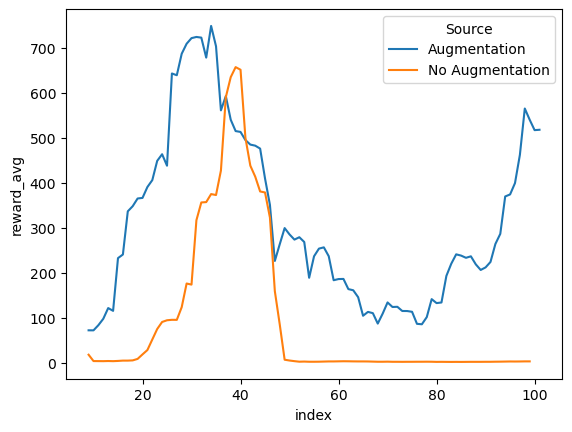

In [45]:
sns.lineplot(data=df, x='index', y='reward_avg', hue="Source")

<AxesSubplot:xlabel='index', ylabel='loss'>

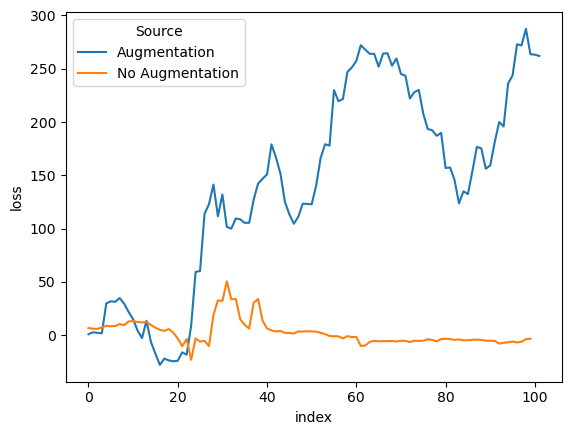

In [47]:
sns.lineplot(data=df, x='index', y='loss', hue="Source")

<AxesSubplot:xlabel='index', ylabel='reward'>

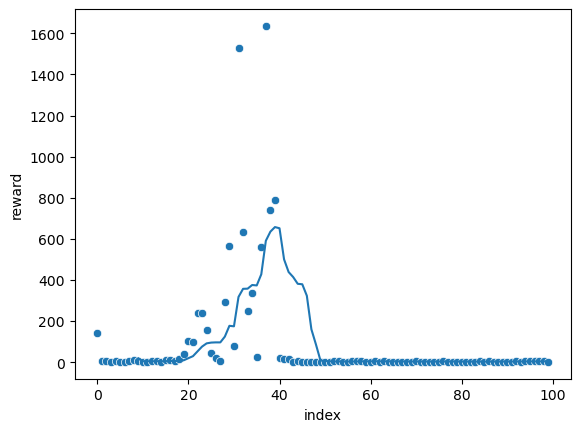

In [16]:
sns.scatterplot(data=df, x='index', y='reward')
sns.lineplot(data=df, x='index', y='reward_avg')